In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [171]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X = data
Y = data["SalePrice"]
X.drop("SalePrice", inplace = True, axis = 1)

In [172]:
#Еще не успел посмотреть курс по предобработке данных, поэтому на данном этапе решил 
#что если менее 15% экземпляров имеют информацию о каком-либо параметре, он не является важным и 
#мы можем удалить столбец, содержащий этот параметр что бы не занимать лишнюю память
for col in X:
    if(X[col].isnull().sum()>1300):
        X.drop(col, inplace = True, axis = 1)

In [173]:
ind = ['LotFrontage','MasVnrArea','GarageYrBlt']
for i in ind:
    X[i].fillna(X[i].median(), inplace = True)
ind = ['GarageType','GarageFinish','Fence','GarageQual','FireplaceQu', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']
for i in ind:
    X[i].fillna('NA', inplace = True)
X['Electrical']=X['Electrical'].fillna('SBrkr')
ind = []
for i in X:
    if (str(X[i][0])==X[i][0]):
        ind.append(i)
X = pd.get_dummies(X, columns=ind)
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [174]:
X.isnull().values.any()

False

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
importances = clf_rf.feature_importances_
std = np.std([clf_rf.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
ind = []
for i in range (0,39):
    ind.append(indices[i])
print(ind)
#убираем фичи, которые не влияют на предсказания
X = X[X.columns[ind]]
X

1. feature 16 (0.076230)
2. feature 27 (0.075718)
3. feature 0 (0.057703)
4. feature 3 (0.054853)
5. feature 12 (0.053776)
6. feature 11 (0.050215)
7. feature 13 (0.048235)
8. feature 9 (0.041540)
9. feature 36 (0.039964)
10. feature 14 (0.032965)
11. feature 7 (0.026390)
12. feature 4 (0.025080)
13. feature 1 (0.022655)
14. feature 28 (0.022133)
15. feature 8 (0.020887)
16. feature 2 (0.020708)
17. feature 29 (0.018719)
18. feature 19 (0.018173)
19. feature 54 (0.017956)
20. feature 23 (0.017479)
21. feature 35 (0.016750)
22. feature 6 (0.016080)
23. feature 192 (0.015025)
24. feature 169 (0.013550)
25. feature 256 (0.013062)
26. feature 154 (0.012011)
27. feature 25 (0.011528)
28. feature 32 (0.007635)
29. feature 221 (0.007079)
30. feature 144 (0.006722)
31. feature 104 (0.006709)
32. feature 26 (0.006651)
33. feature 176 (0.006636)
34. feature 10 (0.006353)
35. feature 137 (0.006314)
36. feature 271 (0.006258)
37. feature 30 (0.006199)
38. feature 202 (0.006057)
39. feature 44 (0.0

,GrLivArea,GarageArea,Id,LotArea,TotalBsmtSF,BsmtUnfSF,1stFlrSF,BsmtFinSF1,YrSold,2ndFlrSF,...,Exterior1st_Wd Sdng,BldgType_1Fam,GarageCars,Foundation_BrkTil,BsmtFinSF2,Exterior1st_HdBoard,PavedDrive_Y,EnclosedPorch,BsmtFinType1_Rec,LotShape_IR1
0,1710,548,1,8450,856,150,856,706,2008,854,...,0,1,2,0,0,0,1,0,0,0
1,1262,460,2,9600,1262,284,1262,978,2007,0,...,0,1,2,0,0,0,1,0,0,0
2,1786,608,3,11250,920,434,920,486,2008,866,...,0,1,2,0,0,0,1,0,0,1
3,1717,642,4,9550,756,540,961,216,2006,756,...,1,1,3,1,0,0,1,272,0,1
4,2198,836,5,14260,1145,490,1145,655,2008,1053,...,0,1,3,0,0,0,1,0,0,1
5,1362,480,6,14115,796,64,796,732,2009,566,...,0,1,2,0,0,0,1,0,0,1
6,1694,636,7,10084,1686,317,1694,1369,2007,0,...,0,1,2,0,0,0,1,0,0,0
7,2090,484,8,10382,1107,216,1107,859,2009,983,...,0,1,2,0,32,1,1,228,0,1
8,1774,468,9,6120,952,952,1022,0,2008,752,...,0,1,2,1,0,0,1,205,0,0
9,1077,205,10,7420,991,140,1077,851,2008,0,...,0,0,1,1,0,0,1,0,0,0


In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[X.columns])
X[X.columns] = scaler.transform(X[X.columns])
X

c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\pandas\c

,GrLivArea,GarageArea,Id,LotArea,TotalBsmtSF,BsmtUnfSF,1stFlrSF,BsmtFinSF1,YrSold,2ndFlrSF,...,Exterior1st_Wd Sdng,BldgType_1Fam,GarageCars,Foundation_BrkTil,BsmtFinSF2,Exterior1st_HdBoard,PavedDrive_Y,EnclosedPorch,BsmtFinType1_Rec,LotShape_IR1
0,0.370333,0.351000,-1.730865,-0.207142,-0.459303,-0.944591,-0.793434,0.575425,0.138777,1.161852,...,-0.405308,0.443533,0.311725,-0.333333,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,-0.704203
1,-0.482512,-0.060731,-1.728492,-0.091886,0.466465,-0.641228,0.257140,1.171992,-0.614439,-0.795163,...,-0.405308,0.443533,0.311725,-0.333333,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,-0.704203
2,0.515013,0.631726,-1.726120,0.073480,-0.313369,-0.301643,-0.627826,0.092907,0.138777,1.189351,...,-0.405308,0.443533,0.311725,-0.333333,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,1.420045
3,0.383659,0.790804,-1.723747,-0.096897,-0.687324,-0.061670,-0.521734,-0.499274,-1.367655,0.937276,...,2.467261,0.443533,1.650307,3.000000,-0.288653,-0.423464,0.299253,4.092524,-0.316585,1.420045
4,1.299326,1.698485,-1.721374,0.375148,0.199680,-0.174865,-0.045611,0.463568,0.138777,1.617877,...,-0.405308,0.443533,1.650307,-0.333333,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,1.420045
5,-0.292145,0.032844,-1.719002,0.360616,-0.596115,-1.139286,-0.948691,0.632450,0.891994,0.501875,...,-0.405308,0.443533,0.311725,-0.333333,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,1.420045
6,0.339875,0.762732,-1.716629,-0.043379,1.433276,-0.566519,1.374993,2.029558,-0.614439,-0.795163,...,-0.405308,0.443533,0.311725,-0.333333,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,-0.704203
7,1.093729,0.051559,-1.714256,-0.013513,0.113032,-0.795173,-0.143941,0.910994,0.891994,1.457466,...,-0.405308,0.443533,0.311725,-0.333333,-0.090220,2.361478,0.299253,3.372372,-0.316585,1.420045
8,0.492168,-0.023301,-1.711883,-0.440659,-0.240402,0.871057,-0.363889,-0.973018,0.138777,0.928110,...,-0.405308,0.443533,0.311725,3.000000,-0.288653,-0.423464,0.299253,2.995929,-0.316585,-0.704203
9,-0.834691,-1.253816,-1.709511,-0.310370,-0.151473,-0.967230,-0.221569,0.893448,0.138777,-0.795163,...,-0.405308,-2.254625,-1.026858,3.000000,-0.288653,-0.423464,0.299253,-0.359325,-0.316585,-0.704203


In [202]:
def get_meta_features(clf, X_train, Y_train, X_test, Y_test stack_cv):
    meta_train = np.zeros_like(Y_train, dtype=float)
    meta_test = np.zeros_like(Y_test, dtype=float)
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, Y_train)):
        
        clf.fit(X_train.iloc[train_ind], Y_train.iloc[train_ind])
        meta_train[train_ind] = clf.predict(X_train.iloc[train_ind])
        meta_test += clf.predict(X_test)
    score = np.arange(clf.score(X_test,Y_test),clf.score(X_test,Y_test),len(meta_train)
    return meta_train, meta_test / stack_cv.n_splits, score

In [203]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


clf_dtrg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=15)
clf_sgd = SGDRegressor()
clf_lr = LinearRegression()
stack_cv = StratifiedKFold(n_splits=10, random_state=555)
meta_train = []
meta_test = []
col_names = []

print('DTR features...')
meta_tr, meta_te = get_meta_features(clf_dtrg, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('dtr_pred')

print('SGD features...')
meta_tr, meta_te = get_meta_features(clf_sgd, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('sgd_pred')

print('LR features...')
meta_tr, meta_te = get_meta_features(clf_lr, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')


DTR features...


c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


SGD features...
LR features...


c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If t

In [204]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)
scaler.fit(X_meta_train[X_meta_train.columns])
X_meta_train[X_meta_train.columns] = scaler.transform(X_meta_train[X_meta_train.columns])
scaler.fit(X_meta_test[X_meta_test.columns])
X_meta_test[X_meta_test.columns] = scaler.transform(X_meta_test[X_meta_test.columns])
clf_lr_meta = LinearRegression()
clf_lr_meta.fit(X_meta_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
clf_lr_meta.score(X_meta_test,Y_test)

0.8443167047575821

In [206]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg.score(X_test,Y_test)

0.8282012516607534

In [207]:
r = DecisionTreeRegressor()
r.fit(X_train, Y_train)
r.score(X_test,Y_test)


0.7869087204331958

In [208]:
r = SGDRegressor()
reg.fit(X_train,Y_train)
reg.score(X_test,Y_test)

0.8282012516607534

0.78


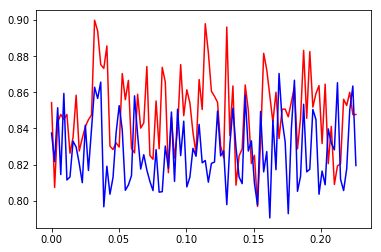

In [209]:
#посмотрим точность на 100 разных сетах, что бы убедиться, что ансамбль дает лучший результат
y_pred_meta = []
y_pred = []
x = []
best = 0
for i in range(0,100):
    X_t, X_tr, y_t, y_tr = train_test_split(X_meta_test,Y_test, test_size = 0.5)
    X_tt, X_ttr, y_tt, y_ttr = train_test_split(X_test,Y_test, test_size = 0.5)
    x.append(i/len(Y_test))
    y_pred_meta.append(clf_lr_meta.score(X_t,y_t))
    y_pred.append(reg.score(X_tt,y_tt))
    if (clf_lr_meta.score(X_t,y_t)>reg.score(X_tt,y_tt)):
        best+=1
print(best/100)
plt.plot(x,y_pred_meta, c = "red")
plt.plot(x,y_pred,c= "blue")
plt.show()

In [ ]:
#мета-алгоритм не всегда показывает более хороший результат, чем обычный. Насколько я понял из лекции и материалов
#которые находил и читал в интернете, мета-алгоритм должен всегда давать лучший результат по сравнению с обычным алгоритмом,
#как минимум для тех случаев, когда наш мета-алгоритм является одноименным с обычным (например как в моей работе LogisticRegression)
#Честно говоря, так и не смог до конца понять, насколько верно выполнил работу, и верно ли понял саму идею обучения мета-алгоритма
#Буду благодарен за комментарии!